In [1]:
# import libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as utils

import numpy as np
import matplotlib.pyplot as plt
from math import ceil

In [12]:
model_root_dir = '/notebooks/my-notebooks/MNIST/'

# get data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(model_root_dir+'MNIST_data', one_hot=False)

Extracting /notebooks/my-notebooks/MNIST/MNIST_data/train-images-idx3-ubyte.gz
Extracting /notebooks/my-notebooks/MNIST/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /notebooks/my-notebooks/MNIST/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /notebooks/my-notebooks/MNIST/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# Hyperparams
input_size = 784
num_classes = 10

batch_size = 100
learning_rate = 0.5

epochs = 2

In [4]:
# create pytorch dataset with mnist data
training_dataset = utils.TensorDataset(torch.Tensor(mnist.train.images),torch.LongTensor(mnist.train.labels))

# create pytorch dataloader for extra features and ease of use in training loop
training_loader = utils.DataLoader(dataset=training_dataset,
                                   batch_size=batch_size,
                                   shuffle=True)

In [5]:
# define NN
class Net(nn.Module):
    
    def __init__(self, input_size, num_classes):
        super(Net, self).__init__()
        
        # define layer as a fully connected layer
        self.layer = nn.Linear(input_size, num_classes) 
    
    # define forward pass function    
    def forward(self, x):
        
        # apply layer and return output
        out = self.layer(x)
        return out

In [6]:
# set net to our Net with params
net = Net(input_size, num_classes)

# define loss function
loss_func = nn.CrossEntropyLoss() 
# define optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) 

In [7]:
# create function to calculate accuracy
def get_accuracy(images,labels):
    
    test_x = Variable(torch.Tensor(images))
    test_y = torch.LongTensor(labels)

    _outputs = net(test_x)
    _, _predicted = torch.max(_outputs.data, 1)
    
    num_correct = (_predicted.cpu() == test_y).sum()
    num_total = test_y.size(0)

    return(str(100.0 * num_correct/num_total)+'%')

In [8]:
# calculate iterations to print as total steps
iterations = int(ceil(training_loader.dataset.target_tensor.size()[0]/float(batch_size)))

# initialize losses array
losses = np.array([])

for epoch in range(epochs):
    
    print 'New epoch', str(epoch+1)+'/'+str(epochs)
    
    # for each batch in data loader
    for idx, (images, labels) in enumerate(training_loader):
        
        # set images and labels to variables so we can calculate the gradient
        images = Variable(images.view(-1, input_size))
        labels = Variable(labels)

        # reset the parameter gradients
        optimizer.zero_grad()
        
        # forward pass
        outputs = net(images)
        # calculate loss
        loss = loss_func(outputs, labels)
        # calculate parameter gradients
        loss.backward()
        # update weights
        optimizer.step()

        if (idx+1) % 50 == 0:
            # calculate validation accuracy
            _accuracy = get_accuracy(mnist.validation.images, mnist.validation.labels)
            # print current status
            print 'step', str(idx+1)+'/'+str(iterations), 'loss', loss.data[0], 'accuracy', _accuracy
            
        # append current loss to losses array to plot
        losses = np.append(losses, loss.data[0])

New epoch 1/2
step 50/550 loss 0.414714843035 accuracy 87.4%
step 100/550 loss 0.289950668812 accuracy 89.4%
step 150/550 loss 0.392772108316 accuracy 90.22%
step 200/550 loss 0.461411833763 accuracy 90.08%
step 250/550 loss 0.455527603626 accuracy 91.0%
step 300/550 loss 0.278138875961 accuracy 90.72%
step 350/550 loss 0.440381556749 accuracy 91.7%
step 400/550 loss 0.266837716103 accuracy 91.12%
step 450/550 loss 0.351747274399 accuracy 91.3%
step 500/550 loss 0.285578280687 accuracy 91.54%
step 550/550 loss 0.423537611961 accuracy 91.6%
New epoch 2/2
step 50/550 loss 0.453916400671 accuracy 91.4%
step 100/550 loss 0.336255341768 accuracy 91.22%
step 150/550 loss 0.345664978027 accuracy 91.78%
step 200/550 loss 0.324494928122 accuracy 91.9%
step 250/550 loss 0.286883741617 accuracy 91.6%
step 300/550 loss 0.450002670288 accuracy 91.58%
step 350/550 loss 0.180936813354 accuracy 91.78%
step 400/550 loss 0.464432418346 accuracy 91.92%
step 450/550 loss 0.26451972127 accuracy 92.0%
step 

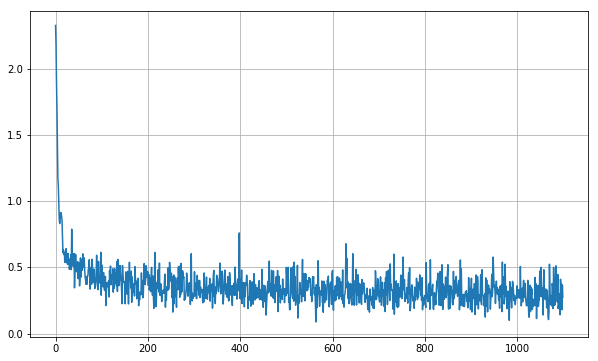

In [9]:
# plot losses
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(losses)
ax.grid(True)

In [10]:
# show evaluation accuracy
print get_accuracy(mnist.test.images,mnist.test.labels)

91.84%


prediction: 2 answer: 2
0 0.13%
1 0.0%
2 98.63%
3 0.24%
4 0.0%
5 0.18%
6 0.75%
7 0.0%
8 0.07%
9 0.0%


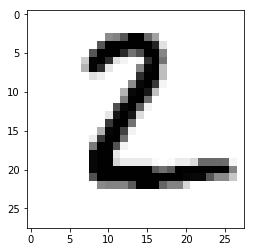

prediction: 6 answer: 6
0 0.17%
1 0.05%
2 10.26%
3 0.68%
4 0.31%
5 0.17%
6 72.28%
7 0.0%
8 16.0%
9 0.08%


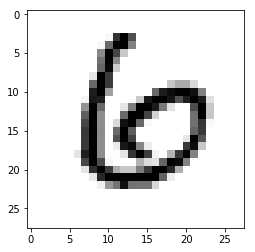

In [11]:
# test and show test images
test_idxs = [1,11]

for test_idx in test_idxs:
    test_x = Variable(torch.Tensor(mnist.test.images[test_idx].reshape(1,-1)))
    test_y = mnist.test.labels[test_idx]

    _prediction = net(test_x)

    print 'prediction:', np.argmax(_prediction.data.numpy()), 'answer:', test_y

    for i,val in enumerate(_prediction[0]):
        print i, str(round(100*np.exp(val)/np.sum(np.exp(_prediction)),2))+'%'

    plt.imshow(test_x.data.numpy().reshape(28,28), cmap='binary')
    plt.show()